# Week 3: Centrality analysis of the FIFA 2018 World Cup Final

This tutorial uses the following packages:
* networkx
* json
* pandas
* matplotlib
* warnings (optional, to get rid of the package warnings)

The dataset I'm working with in this tutorial comes from the paper here: [A public data set of spatio-temporal match events in soccer competitions, Luca Pappalardo, Paolo Cintia, Alessio Rossi, Emanuele Massucco, Paolo Ferragina, Dino Pedreschi & Fosca Giannotti, 2019](https://www.nature.com/articles/s41597-019-0247-7#Tab2)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import json
import pandas as pd
import matplotlib.pyplot as plt

root = "worldcup_events/"

## Players

We will use this later for extracting the node names. Important fields: wyId, currentTeamId and lastName.

In [2]:
with open(root+"players.json") as f:
    players = pd.DataFrame(json.load(f))
    f.close()

players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


## Teams

We will just use this for extracting the teams that we want (France and Croatia for the final)

In [3]:
with open(root+"teams.json") as f:
    teams = pd.DataFrame(json.load(f))
    f.close()
    
teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


## Matches

This shows all the matches that there are events for in the dataset. Just need to check which id number corresponds to the France vs Croatia game.

In [4]:
with open(root+"matches_World_Cup.json") as f:
    matches = pd.DataFrame(json.load(f))
    f.close()
    
matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId
0,Played,4165368,0,"{'9598': {'scoreET': 0, 'coachId': 122788, 'si...",10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",,"[{'refereeId': 378051, 'role': 'referee'}, {'r...",Regular,28
1,Played,4165367,0,"{'2413': {'scoreET': 0, 'coachId': 276858, 'si...",10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",,"[{'refereeId': 380599, 'role': 'referee'}, {'r...",Regular,28
2,Played,4165366,0,"{'2413': {'scoreET': 1, 'coachId': 276858, 'si...",10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)","July 11, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 384995, 'role': 'referee'}, {'r...",ExtraTime,28
3,Played,4165366,0,"{'5629': {'scoreET': 0, 'coachId': 8605, 'side...",10078,2018-07-10 18:00:00,4418,Stadion Krestovskyi,2058014,"France - Belgium, 1 - 0","July 10, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 378232, 'role': 'referee'}, {'r...",Regular,28
4,Played,4165365,0,"{'14358': {'scoreET': 2, 'coachId': 264893, 's...",10078,2018-07-07 18:00:00,9598,Olimpiyskiy Stadion Fisht,2058012,"Russia - Croatia, 2 - 2 (P)","July 7, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 378204, 'role': 'referee'}, {'r...",Penalties,28


## Events

This is the most important dataset which shows all the events that happened, along with the time at which they happened. Important fields: playerId, eventName, subEventName, teamId, eventSec (maybe!)

In [6]:
with open(root+"events_World_Cup.json") as f:
    events = pd.DataFrame(json.load(f))
    f.close()
    
events.head(10) 

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",2057954,Pass,16521,1H,1.656214,85,258612104
1,8,High pass,[{'id': 1801}],139393,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",2057954,Pass,16521,1H,4.487814,83,258612106
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",103668,"[{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]",2057954,Duel,14358,1H,5.937411,10,258612077
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",122940,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]",2057954,Duel,16521,1H,6.406961,10,258612112
4,8,Simple pass,[{'id': 1801}],122847,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",2057954,Pass,16521,1H,8.562167,85,258612110
5,8,Simple pass,[{'id': 1801}],122832,"[{'y': 15, 'x': 71}, {'y': 11, 'x': 92}]",2057954,Pass,16521,1H,10.991292,85,258612113
6,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",122847,"[{'y': 11, 'x': 92}, {'y': 11, 'x': 88}]",2057954,Duel,16521,1H,14.081637,11,258612115
7,8,Simple pass,[{'id': 1801}],122847,"[{'y': 11, 'x': 88}, {'y': 13, 'x': 88}]",2057954,Pass,16521,1H,15.039163,85,258612116
8,8,Simple pass,[{'id': 1801}],122940,"[{'y': 13, 'x': 88}, {'y': 13, 'x': 70}]",2057954,Pass,16521,1H,16.438878,85,258612117
9,8,Simple pass,[{'id': 1801}],122832,"[{'y': 13, 'x': 70}, {'y': 28, 'x': 71}]",2057954,Pass,16521,1H,17.745299,85,258612119


## Extracting the events from the France vs Croatia game

Only interested in the events which happened in the Cup Final, with matchId 2058017.

In [7]:
wc_final_events = events[events['matchId']==2058017]
events = wc_final_events.reset_index(drop=True)
events.head(10)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[],14943,"[{'y': 51, 'x': 50}]",2058017,Pass,9598,1H,1.892339,85,263883958
1,8,Simple pass,[{'id': 1801}],69968,"[{'y': 52, 'x': 39}, {'y': 74, 'x': 34}]",2058017,Pass,9598,1H,3.889375,85,263883959
2,8,Simple pass,[{'id': 1801}],8287,"[{'y': 74, 'x': 34}, {'y': 93, 'x': 30}]",2058017,Pass,9598,1H,6.140946,85,263883960
3,8,Simple pass,[{'id': 1801}],69409,"[{'y': 93, 'x': 30}, {'y': 65, 'x': 11}]",2058017,Pass,9598,1H,9.226570,85,263883963
4,8,Launch,[{'id': 1801}],135747,"[{'y': 65, 'x': 11}, {'y': 51, 'x': 64}]",2058017,Pass,9598,1H,12.658969,84,263883964
5,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",14943,"[{'y': 51, 'x': 64}, {'y': 20, 'x': 63}]",2058017,Duel,9598,1H,15.685687,13,263885674
6,1,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",3309,"[{'y': 49, 'x': 36}, {'y': 80, 'x': 37}]",2058017,Duel,4418,1H,15.685687,13,263885675
7,8,Simple pass,[{'id': 1801}],14812,"[{'y': 20, 'x': 63}, {'y': 17, 'x': 51}]",2058017,Pass,9598,1H,18.364178,85,263883967
8,8,Simple pass,[{'id': 1801}],3476,"[{'y': 17, 'x': 51}, {'y': 5, 'x': 65}]",2058017,Pass,9598,1H,21.667900,85,263883968
9,8,Simple pass,[{'id': 1801}],105361,"[{'y': 5, 'x': 65}, {'y': 18, 'x': 62}]",2058017,Pass,9598,1H,22.807859,85,263883970


## Construct a directed network

Construct a network where the nodes are the different players and a directed edge from node A to node B if A makes a simple pass to B.

In [8]:
G = nx.DiGraph()

teamColours = {9598: 'red', 4418: 'blue'}

for i in range(len(events)-1):
    if events['subEventName'][i]=="Simple pass" and len(events['tags'][i])==1:
        n1, n2 = events['playerId'][i], events['playerId'][i+1]
        p1, p2 = list(players[players['wyId']==n1]['shortName'])[0], list(players[players['wyId']==n2]['shortName'])[0]
        t1, t2 = events['teamId'][i], events['teamId'][i+1]
        t = events['tags'][i]
        if n1 not in G.nodes():
            G.add_node(n1, teamid=t1,color=teamColours[t1], shortName=p1)
        if n2 not in G.nodes():
            G.add_node(n2, teamid=t2,color=teamColours[t2], shortName=p2)
        if any([row['id']==1801 for row in t]):
            G.add_edge(n1,n2)

In [9]:
id_to_name = {}
for n in G.nodes():
    playerName = nx.get_node_attributes(G,'shortName')[n]
    id_to_name[n]=playerName.encode().decode('unicode_escape')


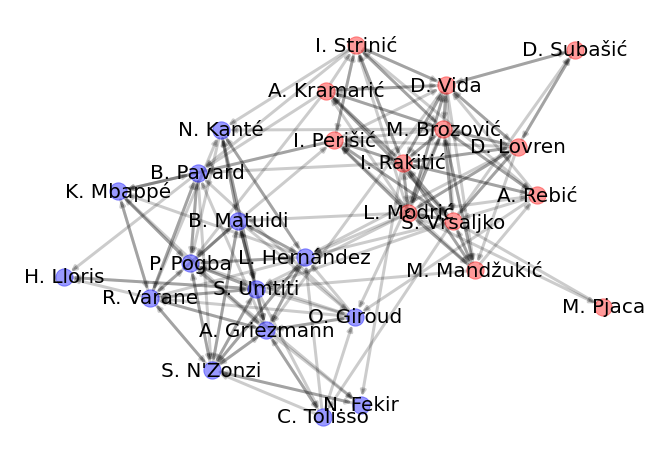

In [14]:
croatia = [n for (n, team) in nx.get_node_attributes(G,"teamid").items() if team == 9598]
france = [n for (n, team) in nx.get_node_attributes(G,"teamid").items() if team == 4418]

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_axis_off()

pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=croatia, node_color='red', alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=france, node_color='blue', alpha=0.4)
nx.draw_networkx_edges(G, pos, alpha=0.2,width=3)
nx.draw_networkx_labels(G, pos, labels=id_to_name, font_size=20)

plt.show()

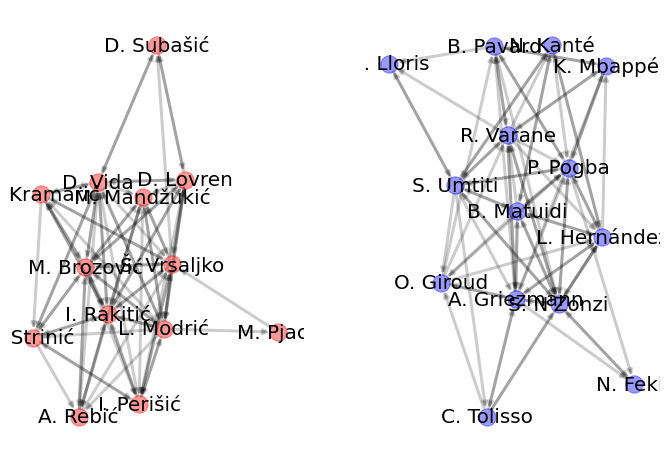

In [16]:
france_graph = G.subgraph(france)
croatia_graph = G.subgraph(croatia)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(1,2,figsize=a4_dims)

f_labels = {node:id_to_name[node] for node in france}
c_labels = {node:id_to_name[node] for node in croatia}

ax[0].set_axis_off()
ax[1].set_axis_off()

pos1 = nx.kamada_kawai_layout(croatia_graph)
nx.draw_networkx_nodes(croatia_graph, pos1, node_color='red', alpha=0.4, ax=ax[0])
nx.draw_networkx_edges(croatia_graph, pos1, ax = ax[0], alpha=0.2,width=3)
nx.draw_networkx_labels(croatia_graph, pos1, ax=ax[0], labels=c_labels, font_size=20)

pos2 = nx.kamada_kawai_layout(france_graph)
nx.draw_networkx_nodes(france_graph, pos2, node_color='blue', alpha=0.4, ax=ax[1])
nx.draw_networkx_edges(france_graph, pos2, ax=ax[1], alpha=0.2,width=3)
nx.draw_networkx_labels(france_graph, pos2, ax=ax[1], labels=f_labels,font_size=20)

plt.show()

In [17]:
def freeman_centralisation(G):
    dc = [G.degree(node) for node in G.nodes()]
    max_dc = max(dc)
    n = len(dc)
    numerator = sum([max_dc - c for c in dc])
    denominator = (n-1)*(n-2)
    return float(numerator)/denominator

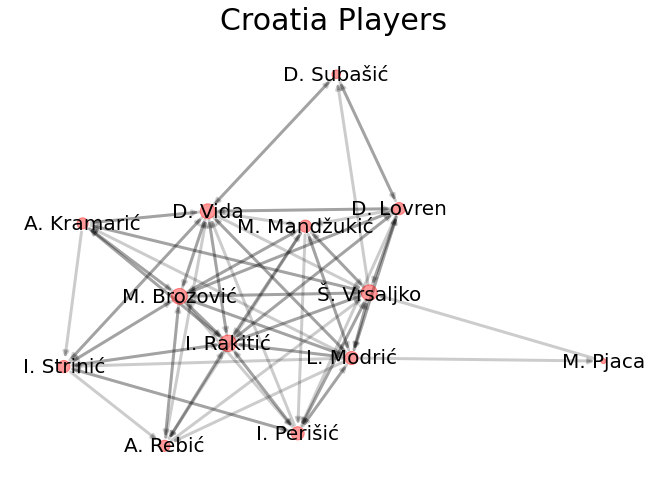

Freeman Centralisation: 0.863636


In [18]:
dc_whole = nx.in_degree_centrality(G)
dc_f = nx.in_degree_centrality(france_graph)
dc_c = nx.in_degree_centrality(croatia_graph)

bc_whole = nx.betweenness_centrality(G)
bc_f = nx.betweenness_centrality(france_graph)
bc_c = nx.betweenness_centrality(croatia_graph)

pc_whole = nx.pagerank(G)
pc_f = nx.pagerank(france_graph)
pc_c = nx.pagerank(croatia_graph)

fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Croatia Players", fontsize = 30)

ax.set_axis_off()
nx.draw_networkx_nodes(croatia_graph, nodelist = bc_c.keys(), node_size = [300*v for v in dc_c.values()], pos=pos1, 
                       node_color='red', alpha=0.4)
nx.draw_networkx_edges(croatia_graph, pos1, alpha=0.2,width=3)
nx.draw_networkx_labels(croatia_graph, pos1, labels=c_labels,font_size=20)
plt.show()
print("Freeman Centralisation: %f" %freeman_centralisation(croatia_graph))

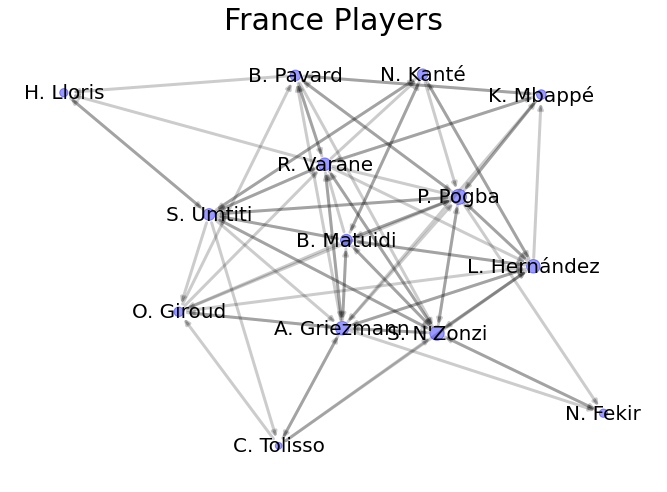

Freeman Centralisation: 0.500000


In [19]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("France Players", fontsize = 30)

ax.set_axis_off()
nx.draw_networkx_nodes(france_graph, nodelist = bc_f.keys(), node_size = [300*v for v in dc_f.values()], pos=pos2, 
                       node_color='blue', alpha=0.4)
nx.draw_networkx_edges(france_graph, pos2, alpha=0.2,width=3)
nx.draw_networkx_labels(france_graph, pos2, labels=f_labels, font_size=20)
plt.show()
print("Freeman Centralisation: %f" %freeman_centralisation(france_graph))

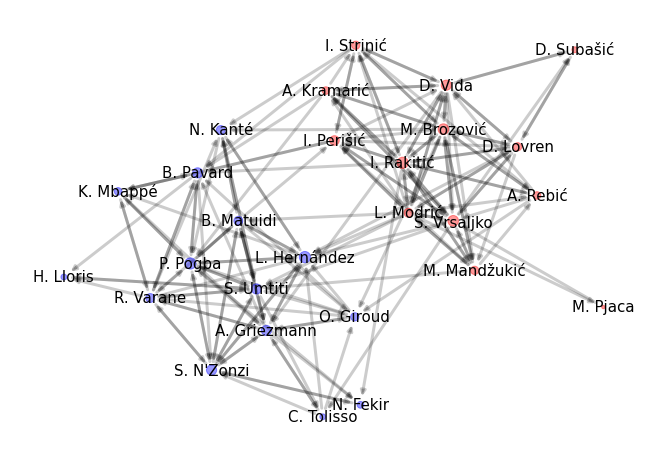

In [20]:
fig, ax = plt.subplots(figsize=a4_dims)

ax.set_axis_off()
nx.draw_networkx_nodes(G, pos, nodelist = [k for k in dc_whole.keys() if k in france], node_size = [300*dc_whole[k] for k in dc_whole.keys() if k in france], 
                       node_color='blue', alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist = [k for k in dc_whole.keys() if k in croatia], node_size = [300*dc_whole[k] for k in dc_whole.keys() if k in croatia], 
                       node_color='red', alpha=0.4)
nx.draw_networkx_edges(G, pos, alpha=0.2,width=3)
nx.draw_networkx_labels(G, pos, labels=id_to_name, font_size=15)
plt.show()